In [504]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from networkx.algorithms import link_prediction

In [505]:
def load_graph(node_file, edge_file):
    # Load nodes
    nodes_df = pd.read_csv(node_file)
    # Load edges
    edges_df = pd.read_csv(edge_file)


    G = nx.Graph()
    
    # Add nodes with attributes
    for _, row in nodes_df.iterrows():
        G.add_node(row['Id'], **row.to_dict())
    
    # Add edges
    for _, row in edges_df.iterrows():
        G.add_edge(row['Source'], row['Target'], **row.to_dict())

    return G

In [506]:
def visualize_graph(graph):
    plt.figure(figsize=(27, 27))
    pos = nx.kamada_kawai_layout(graph, scale=70, dim=2)  # Adjust scale for more spread
    nx.draw(graph, pos, with_labels=True, node_size=20, font_size=11, font_weight='bold', edge_color='#DAA520', alpha=0.71)
    plt.title("TrumpWorld Network")
    plt.show()

In [507]:
def analyze_basic_characteristics(graph):
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    degree_distribution = [degree for node, degree in graph.degree()]
    clustering_coefficient = nx.average_clustering(graph)
    # Printing some basic stats
    print(f"Number of Nodes: {num_nodes}")
    print(f"Number of Edges: {num_edges}")
    print(f"Degree Distribution: {degree_distribution}")
    print(f"Global Clustering Coefficient: {clustering_coefficient}")

    # Plotting degree distribution
    plt.hist(degree_distribution, bins=range(max(degree_distribution)+1))
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

In [508]:
"""
Link prediction: 
1.- Adamic-Adar index
2.- Jaccard coefficient
3.- Preferential attachment
"""
def link_prediction_analysis(graph):

    adamic_adar = list(link_prediction.adamic_adar_index(graph))
    sorted_adamic_adar = sorted(adamic_adar, key=lambda x: x[2], reverse=True)

    jaccard = list(link_prediction.jaccard_coefficient(graph))
    sorted_jaccard = sorted(jaccard, key=lambda x: x[2], reverse=True)

    preferential_attachment = list(link_prediction.preferential_attachment(graph))
    sorted_preferential_attachment = sorted(preferential_attachment, key=lambda x: x[2], reverse=True)

    print("Top 10 most probable links (Adamic-Adar Index):")
    for u, v, p in sorted_adamic_adar[:10]:
        print(f"({u}, {v}) -> score: {p}")

    print("\nTop 10 most probable links (Jaccard Coefficient):")
    for u, v, p in sorted_jaccard[:10]:
        print(f"({u}, {v}) -> score: {p}")

    print("\nTop 10 most probable links (Preferential Attachment):")
    for u, v, p in sorted_preferential_attachment[:10]:
        print(f"({u}, {v}) -> score: {p}")

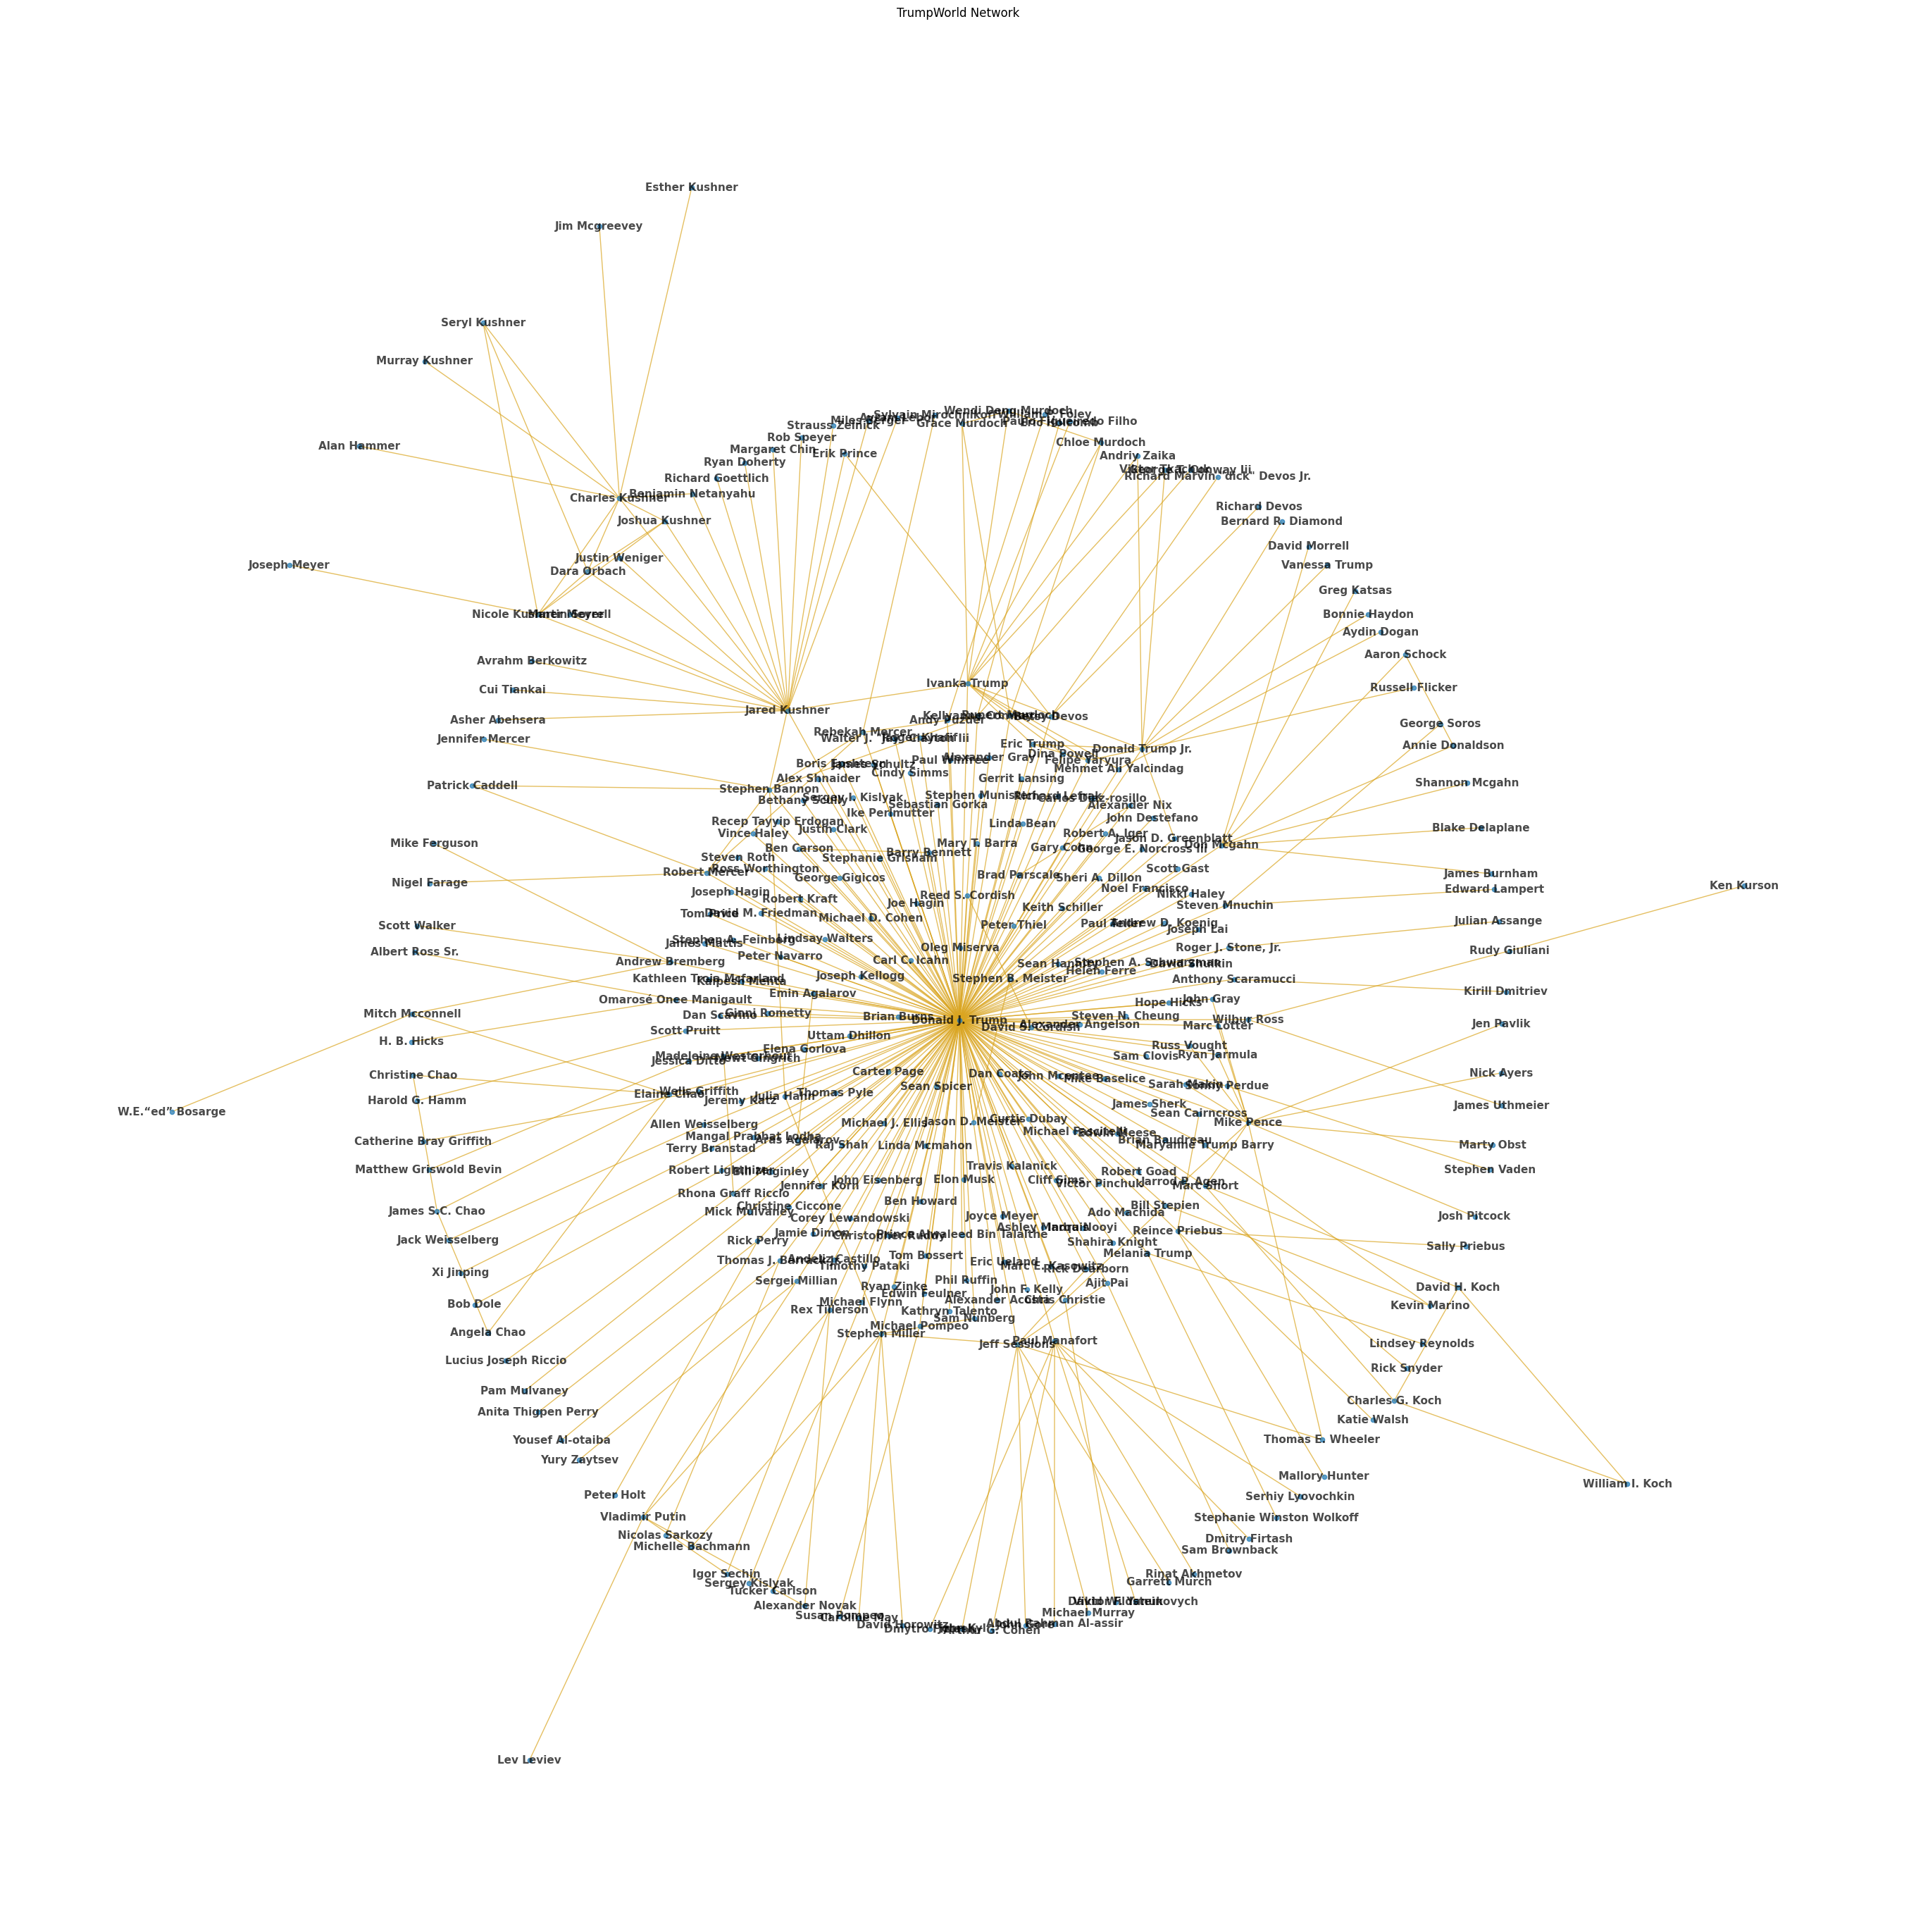

Number of Nodes: 303
Number of Edges: 366
Degree Distribution: [1, 183, 2, 2, 1, 19, 1, 1, 1, 1, 3, 2, 4, 3, 1, 1, 3, 13, 3, 3, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 8, 2, 2, 1, 2, 1, 1, 1, 5, 5, 1, 8, 5, 2, 3, 1, 1, 10, 1, 3, 1, 5, 1, 4, 1, 2, 1, 3, 1, 1, 4, 13, 2, 3, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 4, 11, 4, 1, 1, 8, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 3, 5, 1, 1, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 9, 1, 1, 1, 3, 6, 4, 1, 1, 5, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 3, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Global Clustering Co

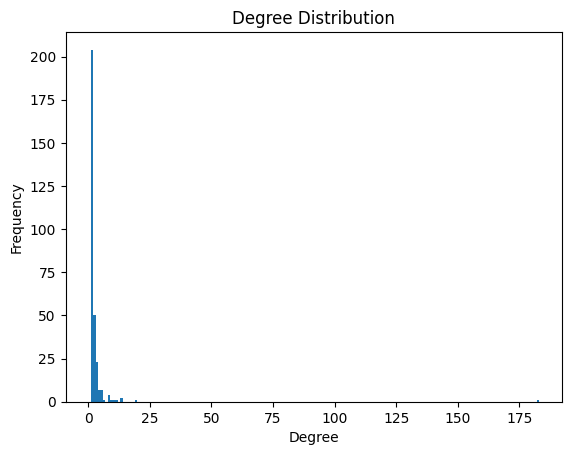

Top 10 most probable links (Adamic-Adar Index):
(Kevin Marino, Donald J. Trump) -> score: 2.352934267515801
(Chloe Murdoch, Grace Murdoch) -> score: 2.2103496985049547
(Ivanka Trump, Rupert Murdoch) -> score: 2.0124359651197095
(Wendi Deng Murdoch, Rupert Murdoch) -> score: 1.8204784532536746
(Marc Short, William I. Koch) -> score: 1.8204784532536746
(Bill Stepien, Maryanne Trump Barry) -> score: 1.634652552754998
(Mike Pence, Jeff Sessions) -> score: 1.634652552754998
(Betsy Devos, Stephen Bannon) -> score: 1.634652552754998
(Donald J. Trump, Vladimir Putin) -> score: 1.631586747071319
(Joshua Kushner, Seryl Kushner) -> score: 1.613740043014111

Top 10 most probable links (Jaccard Coefficient):
(George Gigicos, George E. Norcross Iii) -> score: 1.0
(George Gigicos, Linda Mcmahon) -> score: 1.0
(George Gigicos, Sam Clovis) -> score: 1.0
(George Gigicos, Robert Goad) -> score: 1.0
(George Gigicos, James Schultz) -> score: 1.0
(George Gigicos, Christine Ciccone) -> score: 1.0
(George Gig

In [509]:
if __name__ == "__main__":
    node_file = 'trump-nodes.csv'
    edge_file = 'trump-edges.csv'
    graph = load_graph(node_file, edge_file)

    visualize_graph(graph)
    analyze_basic_characteristics(graph)
    link_prediction_analysis(graph)